In [1]:
#Packages for data visualization
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sn

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Loading the data
import pandas as pd
data=pd.read_csv("car data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.shape

(301, 9)

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

The data is complete and is free of missing elements. so no rows are dropped.

In [8]:
data['Car_Name'].unique()


array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [9]:
print(data.Car_Name.value_counts())

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Hero  CBZ Xtreme             1
UM Renegade Mojave           1
Bajaj Avenger Street 220     1
etios gd                     1
Bajaj Avenger 150            1
Name: Car_Name, Length: 98, dtype: int64


Conclusion: 
1. In a dataset of 301 rows, there are 98 unique car names and there are several car names with only one occurence. So this column can not provide enough information needed for prediction.
2. In the list of Car_Names there are names of several two wheelers which can hamper the regression model. 

<AxesSubplot:xlabel='Selling_Price', ylabel='Car_Name'>

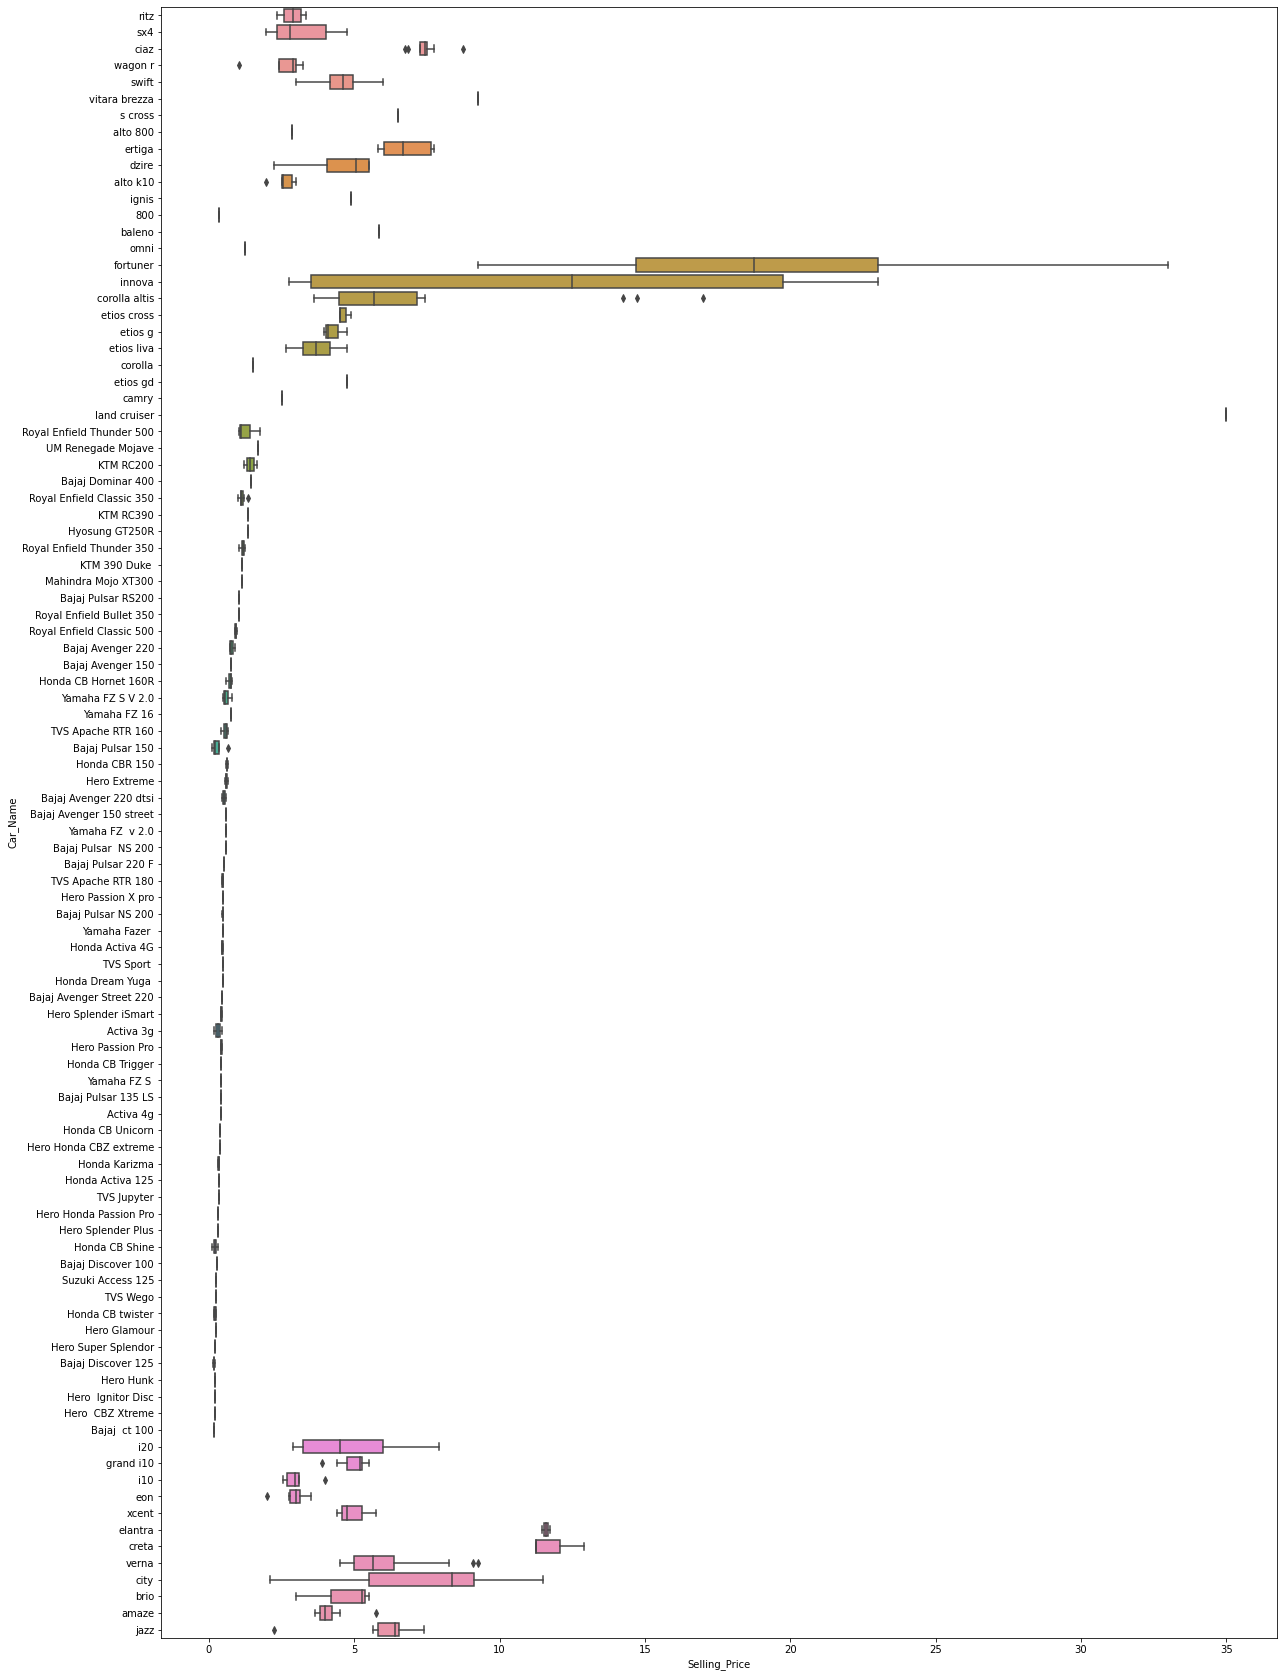

In [10]:
pt.figure(figsize=(20,30))
sn.boxplot(x='Selling_Price',y='Car_Name',data=data)

This two wheelers are mostly of low price, so we shall eliminate those rows which has present price below 80,000.

In [11]:
data = data.loc[data["Present_Price"] >= 0.8]
data.shape

(260, 9)

In [12]:
data.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Honda CBR 150', 'Bajaj Avenger 220 dtsi',
       'Bajaj Avenger 150 street', 'Yamaha FZ  v 2.0',
       'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F', 'TVS Apache RTR 180',
       'Bajaj Pulsar NS 200', 'Yamaha Fazer

Majority of rows with two wheelers got eliminated.

In [13]:
#Now the Car_name column is dropped.
data.drop(['Car_Name'],axis=1,inplace=True)

# Data Pre-processing and Analysis

The age of the car can give a better model which we can calculate from Year column.

In [14]:
data['Car_Age'] = 2019 - data.Year #since the dataset is from yeear 2019
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,5


<AxesSubplot:xlabel='Car_Age'>

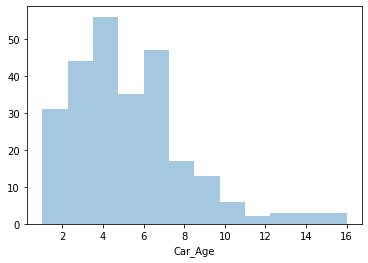

In [15]:
sn.distplot(data['Car_Age'],kde=False)

Conclusion: Most of the cars age are less than 10 years.

In [16]:
#Dropping the year column
data.drop(['Year'],inplace=True,axis=1)

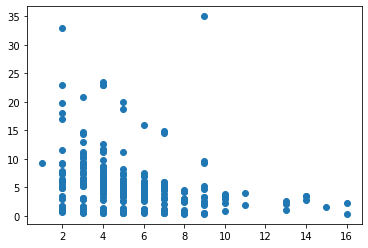

In [17]:
pt.scatter(x=data['Car_Age'],y=data["Selling_Price"])

Conclusion: The graph clearly shows that price of car decreases with its age.

In [18]:
print (data.Fuel_Type.value_counts())


Petrol    198
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


There are only two rows with fuel type as CNG(Not enough for prediction)

In [19]:
#Dropping rows with fuel type as CNG

data = data.loc[data["Fuel_Type"] != "CNG"]
data.Fuel_Type.value_counts()

Petrol    198
Diesel     60
Name: Fuel_Type, dtype: int64

In [20]:
data.Seller_Type.value_counts()

Dealer        193
Individual     65
Name: Seller_Type, dtype: int64

In [21]:
data.Transmission.value_counts()

Manual       227
Automatic     31
Name: Transmission, dtype: int64

In [22]:
data.Owner.value_counts()

0    252
1      5
3      1
Name: Owner, dtype: int64

In [23]:
data = data.loc[data["Owner"] != 3]
data.Owner.value_counts()

0    252
1      5
Name: Owner, dtype: int64

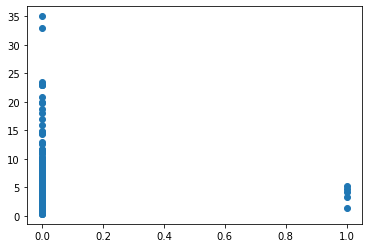

In [24]:
pt.scatter(x=data['Owner'],y=data["Selling_Price"])

The graph shows as number of owners increases the selling pricee decreases. But the data is less to conclude.

In [25]:
#One Hot Encoding
data = pd.get_dummies(data, drop_first=True)
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,5,1,0,1
1,4.75,9.54,43000,0,6,0,0,1
2,7.25,9.85,6900,0,2,1,0,1
3,2.85,4.15,5200,0,8,1,0,1
4,4.60,6.87,42450,0,5,0,0,1


# Data Visualization

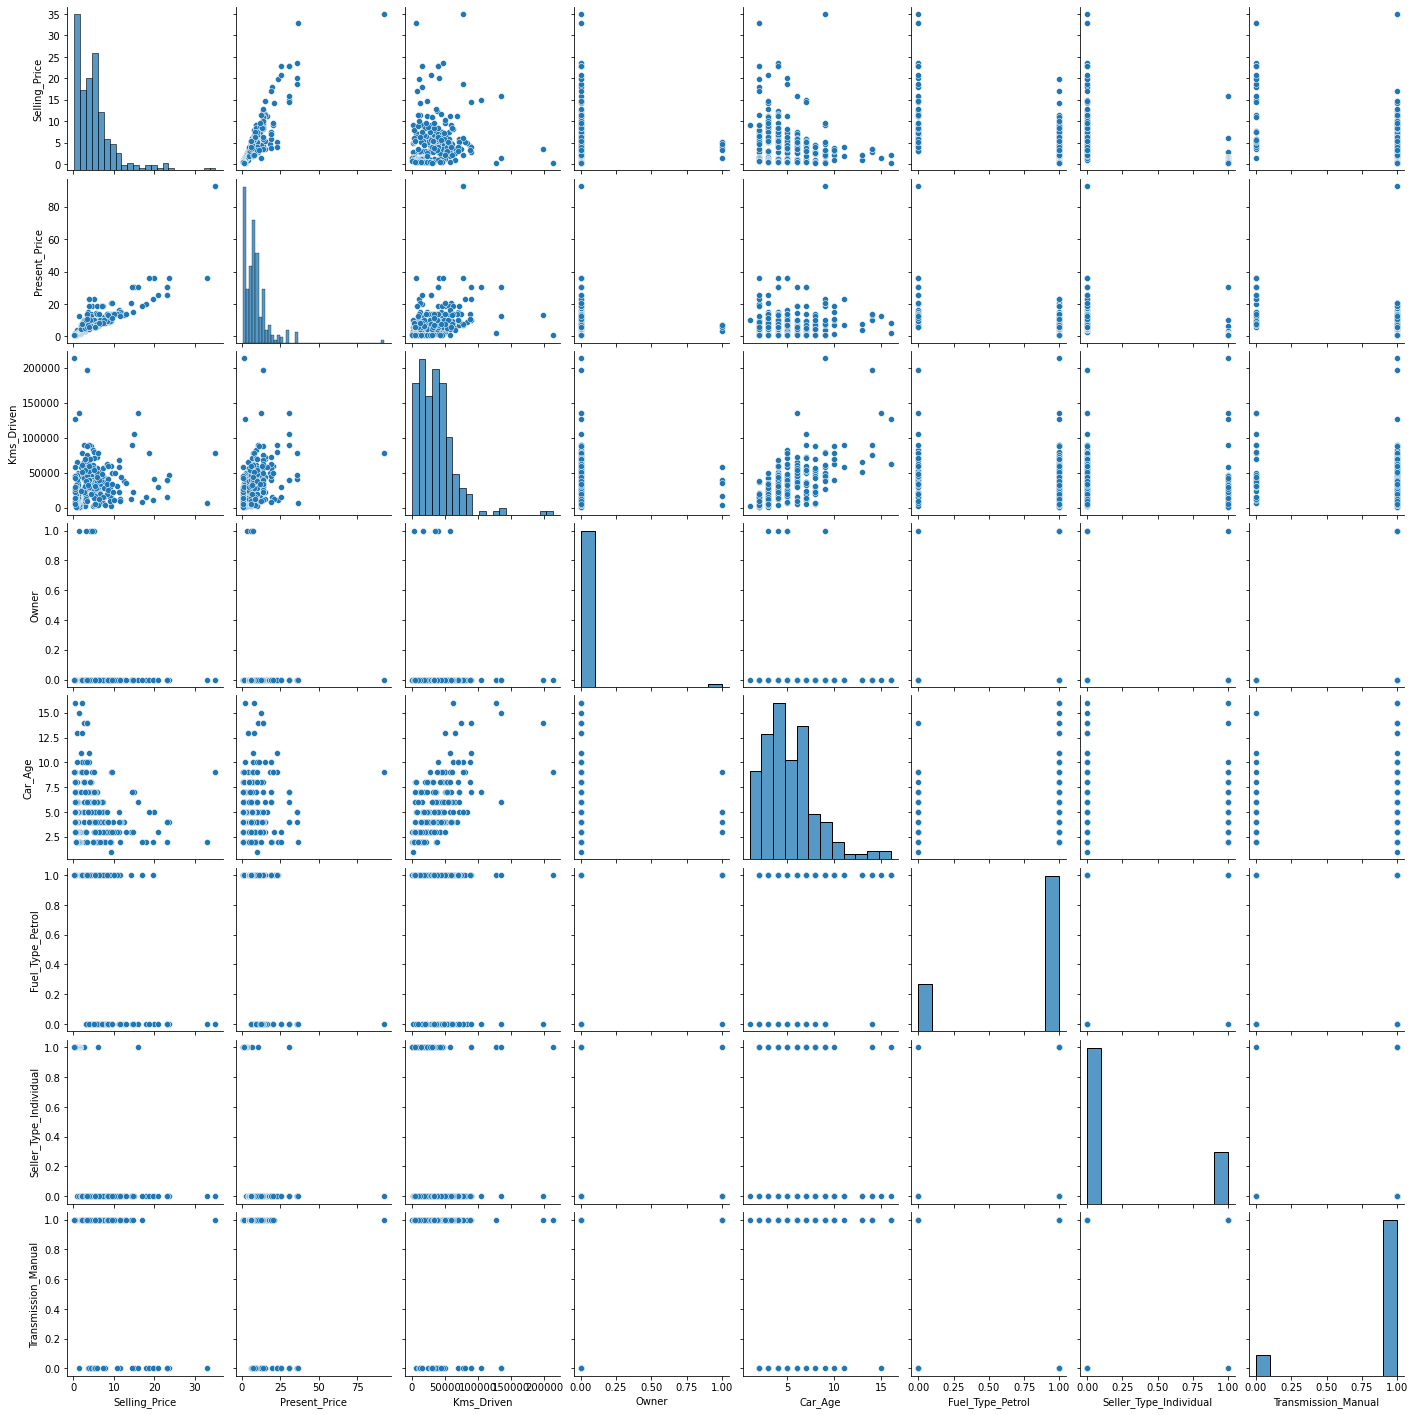

In [26]:
sn.pairplot(data=data)

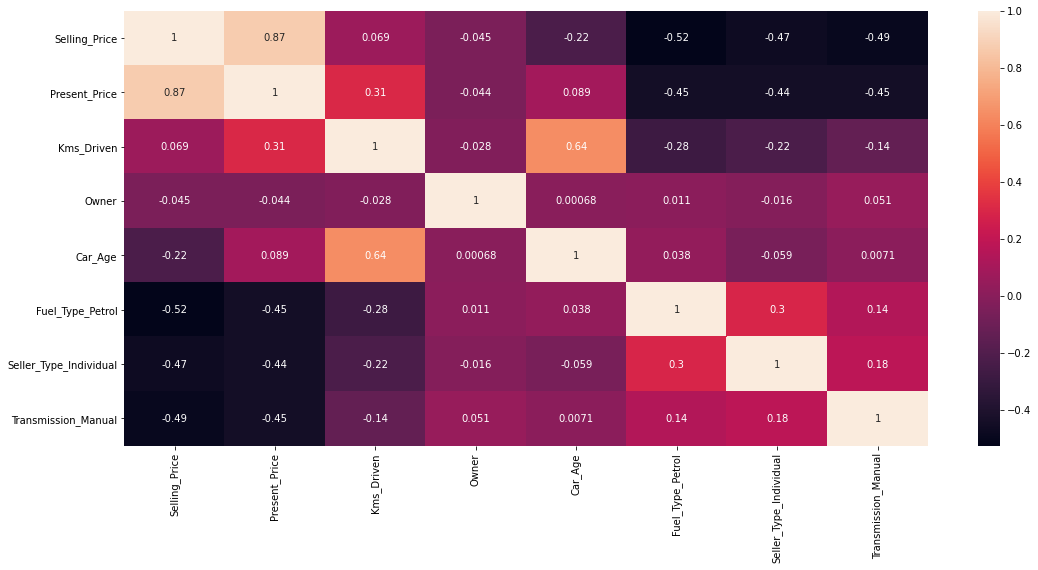

In [27]:
#Finding correlation between various variables
pt.figure(figsize=(18,8))
sn.heatmap(data.corr(),annot=True);

Conclusion:
The selling price has a high correlation with present price. It is the most defining factor for the predictive model.


# Splittting Data

In [28]:
y = data.pop('Selling_Price')
x=data

In [29]:
x.shape,y.shape

((257, 7), (257,))

In [30]:
x.head(2)

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,5,1,0,1
1,9.54,43000,0,6,0,0,1


In [31]:
y.head(2)

0    3.35
1    4.75
Name: Selling_Price, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((205, 7), (52, 7), (205,), (52,))

# Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [35]:
#training model
reg.fit(x_train, y_train)

LinearRegression()

In [36]:
#Predicting for test Dataset
y_pred = reg.predict(x_test)

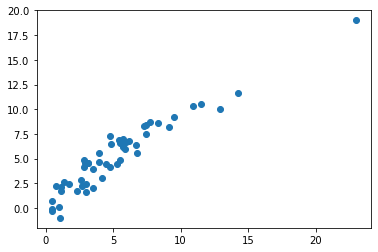

In [37]:
pt.scatter(y_test,y_pred)

The model seems to work better for lower values of selling price

In [38]:
d=pd.DataFrame({"Prediction":y_pred, "Actual":y_test, "Difference":y_pred-y_test})

In [39]:
d

,Prediction,Actual,Difference
209,6.492532,4.85,1.642532
230,6.742110,6.15,0.592110
84,2.020754,3.49,-1.469246
31,1.753920,2.35,-0.596080
9,7.474053,7.45,0.024053
6,5.603177,6.75,-1.146823
244,6.665392,5.95,0.715392
25,2.452994,3.00,-0.547006
123,0.078274,1.00,-0.921726
104,2.668464,1.35,1.318464


# Measuring Accuracy

In [40]:
#Mean Squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

1.690839389387559

In [41]:
#Root Mean Squared Error
np.sqrt(mean_squared_error(y_test,y_pred))

1.3003228019947812

In [42]:
r2_score = reg.score(x_test,y_test)
print(r2_score*100,'%')

89.66085659299891 %


In [43]:
r2_score = reg.score(x_train,y_train)
print(r2_score*100,'%')

89.29371596333648 %


Conclusion: The R2 score is almost same for training and testing data therefore there is no problem of overfitting.